In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.backend import sigmoid

In [2]:
epochs = 1500
act_func = ["relu","tanh"]
func_list = ["x","tanh","x^2","sin"]
# act_func = ["relu"]
# func_list = ["x"]
gap = 5
samples = 10
n = 32
n_points = 1500
tf.random.set_seed(42)
np.random.seed(42)
keras.backend.clear_session()

In [3]:
def getY(name, x):
    """ Sampling periodic and non periodic funcitons """
    if name == "x":
        return tf.Variable(x)
    elif name == "tanh":
        return tf.tanh(x)
    elif name == "x^2":
        x = tf.Variable(x)
        return x*x
    elif name == "sin":
        return tf.sin(x)
    else:
        return None

In [4]:
def get_fn_model(activation,act_param):
    """ Simple Neural network model creation """
    glort_uni_init = tf.keras.initializers.GlorotUniform()
    data_in = keras.layers.Input(shape= (1))
    x = keras.layers.Dense(512,kernel_initializer=glort_uni_init)(data_in)
    act_fn = keras.activations.get(activation)
    if activation == "snake": 
        x = act_fn(x,act_param[0])
    else:
        x = act_fn(x)
    x = keras.layers.Dense(1)(x)
    model = keras.models.Model(data_in,x)
    model.summary()
    return model

In [5]:
from tensorflow.keras import optimizers
def compile_model(model):
    """ Compile the model with SGD otimizer """
    sgd_opt = optimizers.SGD(learning_rate=0.001)
    model.compile(optimizer=sgd_opt, loss="mae")

In [6]:
def model_fit(x_train, y_train,epochs, model):
    """ Fit the model given the training Data """
    if x_train.shape[1:] == ():
        x_train = tf.reshape(x_train,[-1,1])
    if y_train.shape[1:] == ():
        y_train = tf.reshape(y_train,[-1,1])
    history = model.fit(x_train,y_train, epochs=epochs)
    return history

In [7]:
def exe_model(act_fn,act_param,func, x_train,epochs,gap, samples):
    """ Genrates, compiles and fits the model """
    model = get_fn_model(act_fn,act_param)
    compile_model(model)
    history = model_fit(x_train,getY(func,x_train),epochs,model)
    return model

In [8]:
# Data training and test input sampling
x_test_sin = np.linspace(-3.5*(gap+samples),3.5*(gap+samples),n_points)
x_left = np.random.uniform(-gap-samples,-gap,n)
x_right = np.random.uniform(gap,gap+samples,n)
x_train_sin = np.hstack([x_left,x_right])

## Plotting x, tanh, x^2 and sin(x) function with activation tanh and ReLu.

In [9]:
# Generate and fit list of neural network model one for each of 
# sampling fucntions and activation functions
model_lists = [[exe_model(act_fn,10,func,x_train_sin,epochs,gap,samples) 
               for act_fn in act_func]for func in func_list]

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step - loss: 0.1064
Epoch 1052/1500
2/2 [==============================] - 0s 7ms/step - loss: 0.1009
Epoch 1053/1500
2/2 [==============================] - 0s 7ms/step - loss: 0.1088
Epoch 1054/1500
2/2 [==============================] - 0s 8ms/step - loss: 0.0521
Epoch 1055/1500
2/2 [==============================] - 0s 6ms/step - loss: 0.0522
Epoch 1056/1500
2/2 [==============================] - 0s 7ms/step - loss: 0.0526
Epoch 1057/1500
2/2 [==============================] - 0s 7ms/step - loss: 0.0771
Epoch 1058/1500
2/2 [==============================] - 0s 6ms/step - loss: 0.1155
Epoch 1059/1500
2/2 [==============================] - 0s 7ms/step - loss: 0.1168
Epoch 1060/1500
2/2 [==============================] - 0s 8ms/step - loss: 0.1302
Epoch 1061/1500
2/2 [==============================] - 0s 6ms/step - loss: 0.1209
Epoch 1062/1500
2/2 [==============================] - 0s 8ms/s

In [10]:
def plot_comparison(x_train,x_test,model_lists):
    """ Comparison plot for each sampling and activation functions """
    fig = plt.figure(figsize=(28,10))
    row = len(act_func)
    col = len(func_list)
    for i,fun in enumerate(func_list):
        # Plot for "relu"
        plt.subplot(row,col,i+1)
        plt.plot(x_test/(gap+samples),getY(func_list[i],x_test).numpy())
        plt.plot(x_test/(gap+samples),
          model_lists[i][0].predict(x_test/(gap+samples)))
        plt.scatter(x_train/(gap+samples),getY(func_list[i],x_train).numpy())
        plt.legend(["ground Truth","prediction","training"])
        plt.title("{} with {}".format(fun,act_func[0]))
                
        # Plot for "tanh"
        plt.subplot(row,col,col+(i+1))
        plt.plot(x_test/(gap+samples),getY(func_list[i],x_test).numpy())
        plt.plot(x_test/(gap+samples),
          model_lists[i][1].predict(x_test/(gap+samples)))
        plt.scatter(x_train/(gap+samples),getY(func_list[i],x_train).numpy())
        plt.legend(["ground Truth","prediction","training"])
        plt.title("{} with {}".format(fun,act_func[1]))        
    plt.show()

47/47 [==============================] - 0s 2ms/step


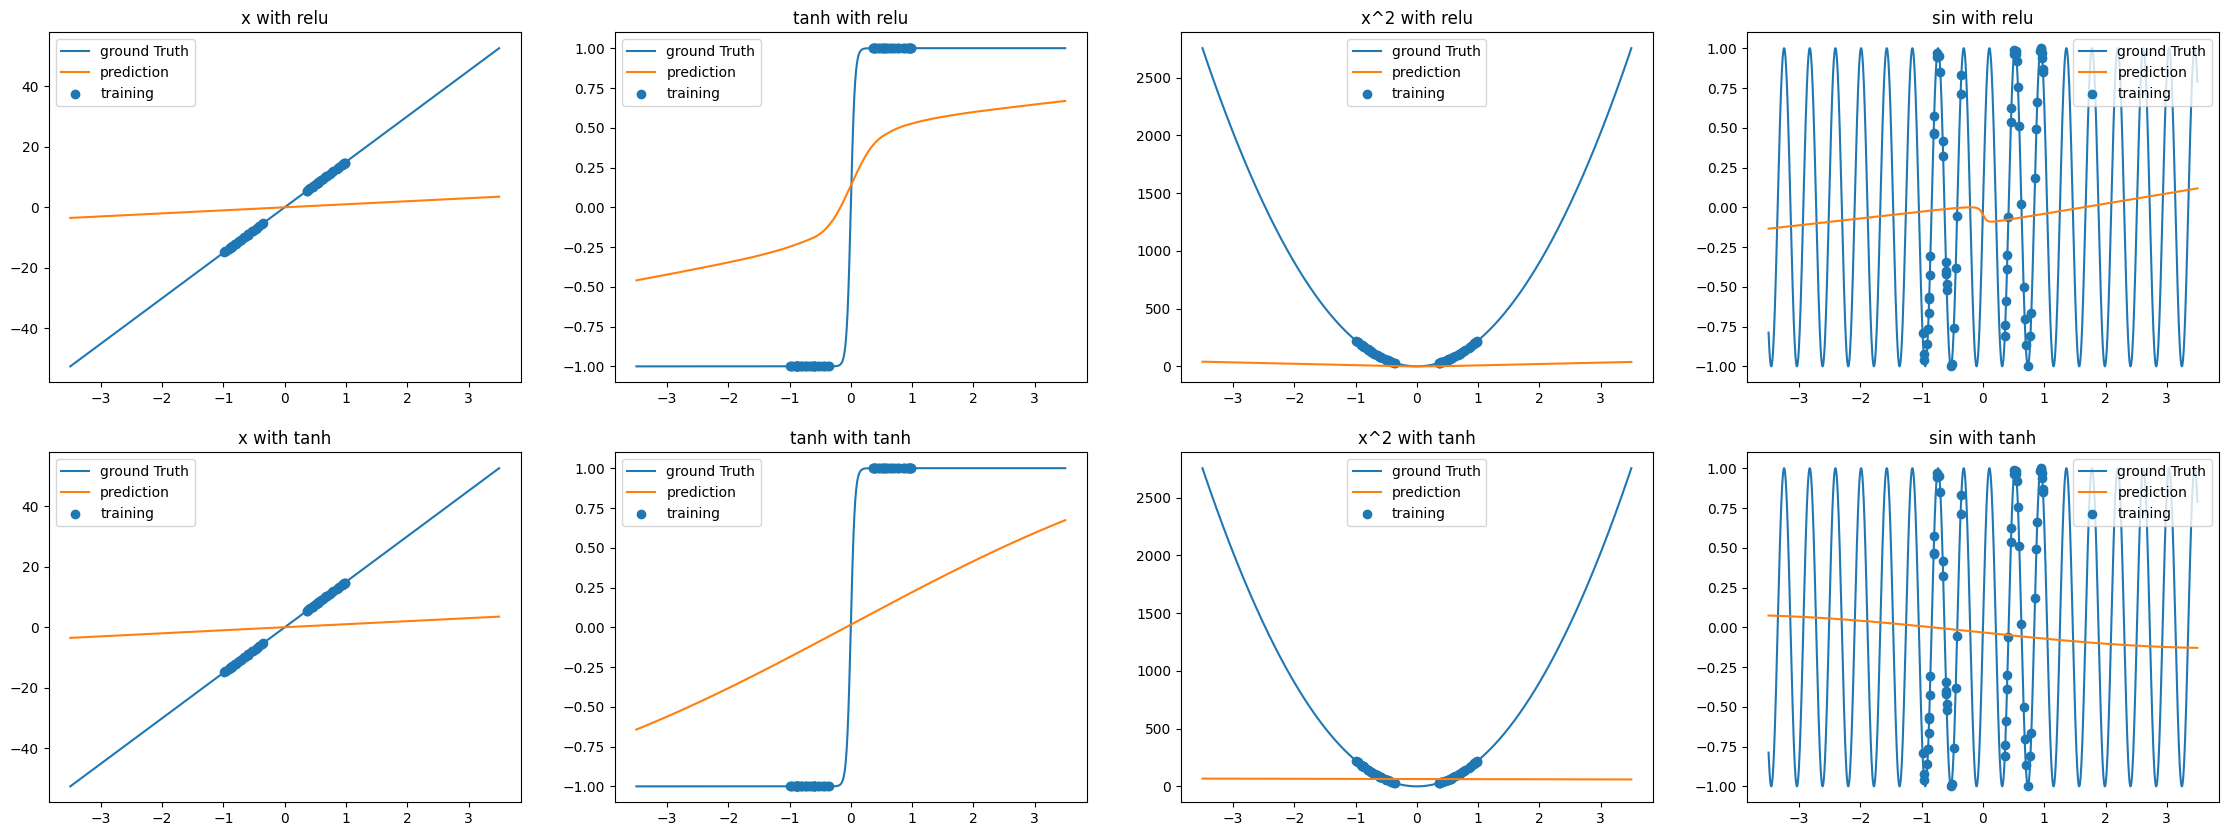

In [17]:
plot_comparison(x_train_sin,x_test_sin,model_lists)

## Sin function with Sin activation and Snake Activation Function

In [12]:
from tensorflow.keras.utils import get_custom_objects
def snake(x, a=10):
    """ Activation Function x + 1/a*sin(a*x)**2 """
    return x + (tf.sin(a*x)**2)/a
def sin_func(x):
    """ Activation Function sin(x) """
    return x + tf.sin(x)
get_custom_objects().update({"snake": snake})
get_custom_objects().update({"sin_func": sin_func})

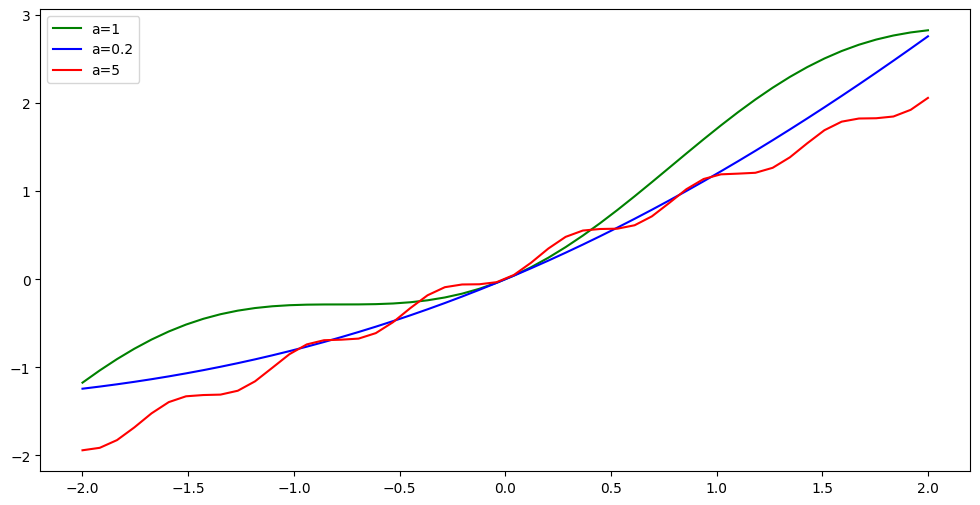

In [ ]:
def plot_snake_fn(x):
    """ Plot comparison between functions"""
    fig = plt.figure(figsize=(12,6))
    plt.plot(x,snake(x,1),"g")
    plt.plot(x,snake(x,0.2),"b")
    plt.plot(x,snake(x,5),"r")
    plt.legend(["a=1","a=0.2","a=5"])
    # save_plot("PeriodicFunction_a_values1")
    plt.show()
x = np.linspace(-2,2,50)
plot_snake_fn(x)

In [14]:
def plot_sin(name, model, x_train, x_test):
    """ Plot Sin fucntion, its sampling points and model Prediction """   
    plt.figure(figsize=(12,4))
    plt.plot(x_test,getY("sin",x_test).numpy(),"g")
    plt.plot(x_test,model.predict(x_test),"r")
    plt.scatter(x_train,getY("sin",x_train).numpy())
    plt.legend(["ground Truth","prediction","training"])
    plt.show()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 512)          1024        ['input_9[0][0]']                
                                                                                                  
 tf.math.multiply (TFOpLambda)  (None, 512)          0           ['dense_16[0][0]']               
                                                                                                  
 tf.math.sin (TFOpLambda)       (None, 512)          0           ['tf.math.multiply[0][0]']       
                                                                                            

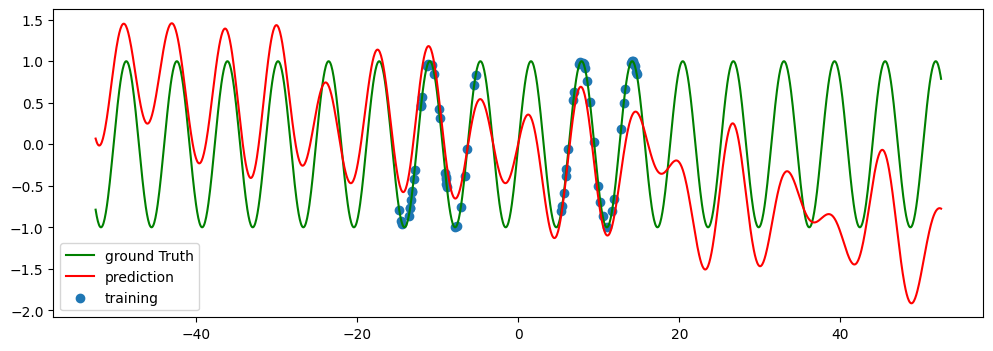

In [ ]:
model_snake = exe_model("snake",[5],"sin",x_train_sin,epochs,gap, samples)
plot_sin("snake", model_snake, x_train_sin, x_test_sin)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 512)          1024        ['input_10[0][0]']               
                                                                                                  
 tf.math.sin_1 (TFOpLambda)     (None, 512)          0           ['dense_18[0][0]']               
                                                                                                  
 tf.__operators__.add_1 (TFOpLa  (None, 512)         0           ['dense_18[0][0]',               
 mbda)                                                            'tf.math.sin_1[0][0]']    

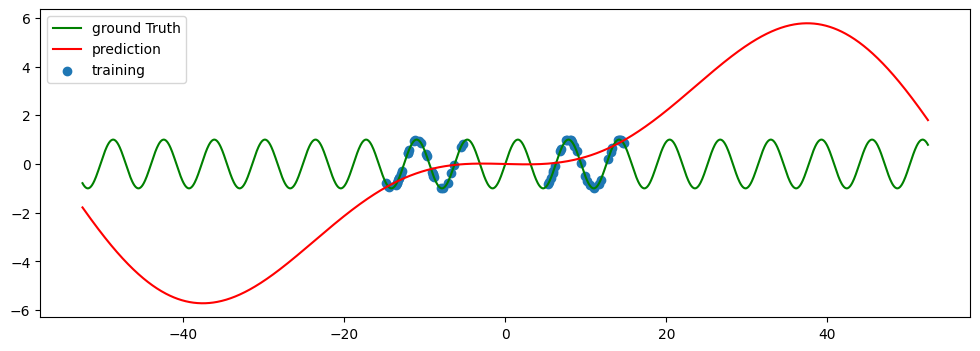

In [16]:
model_sin = exe_model("sin_func",[5],"sin",x_train_sin,epochs,gap, samples)
plot_sin("sin", model_sin, x_train_sin, x_test_sin)